In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

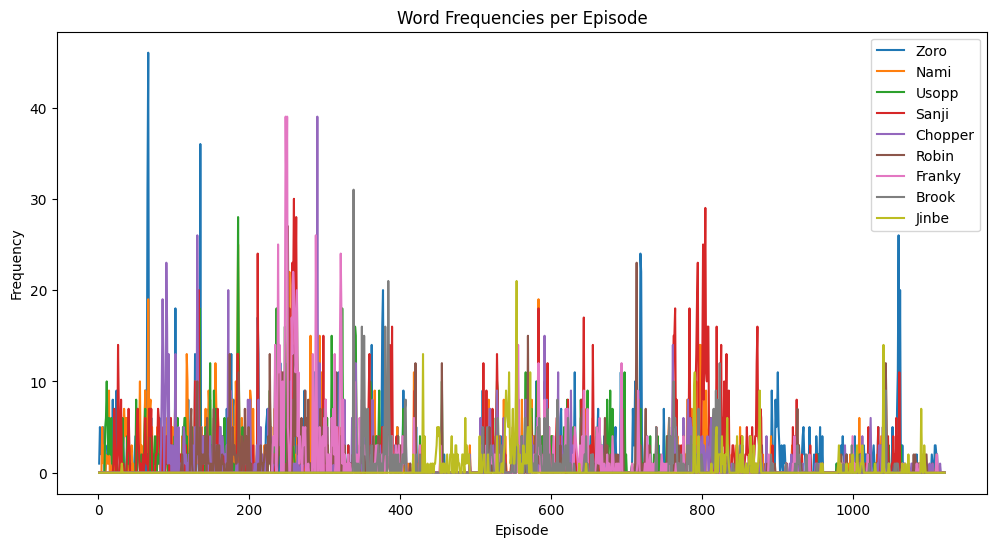

In [33]:
df = pd.read_csv('data2.csv')
              
words_to_check = ['Zoro', 'Nami', 'Usopp', 'Sanji', 'Chopper', 'Robin', 'Franky', 'Brook', 'Jinbe' ]
#words_to_check = ['Kid']

# Initialize a dictionary to store word frequencies
word_frequencies = {word: [] for word in words_to_check}
word_frequencies['Episode'] = []

# Calculate word frequencies for each episode
for index, row in df.iterrows():
    summary = row['Summary'] if pd.notnull(row['Summary']) else ''
    word_frequencies['Episode'].append(row['Episode'])
    for word in words_to_check:
        word_frequencies[word].append(summary.lower().split().count(word.lower()))

# Create a DataFrame for word frequencies
freq_df = pd.DataFrame(word_frequencies)

# Plot the word frequencies
plt.figure(figsize=(12, 6))
for word in words_to_check:
    sns.lineplot(data=freq_df, x='Episode', y=word, label=word)

plt.xlabel('Episode')
plt.ylabel('Frequency')
plt.title('Word Frequencies per Episode')
plt.legend()
plt.show()

C:\Users\Tomás\AppData\Local\Temp\ipykernel_59636\3620915590.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('Arc')


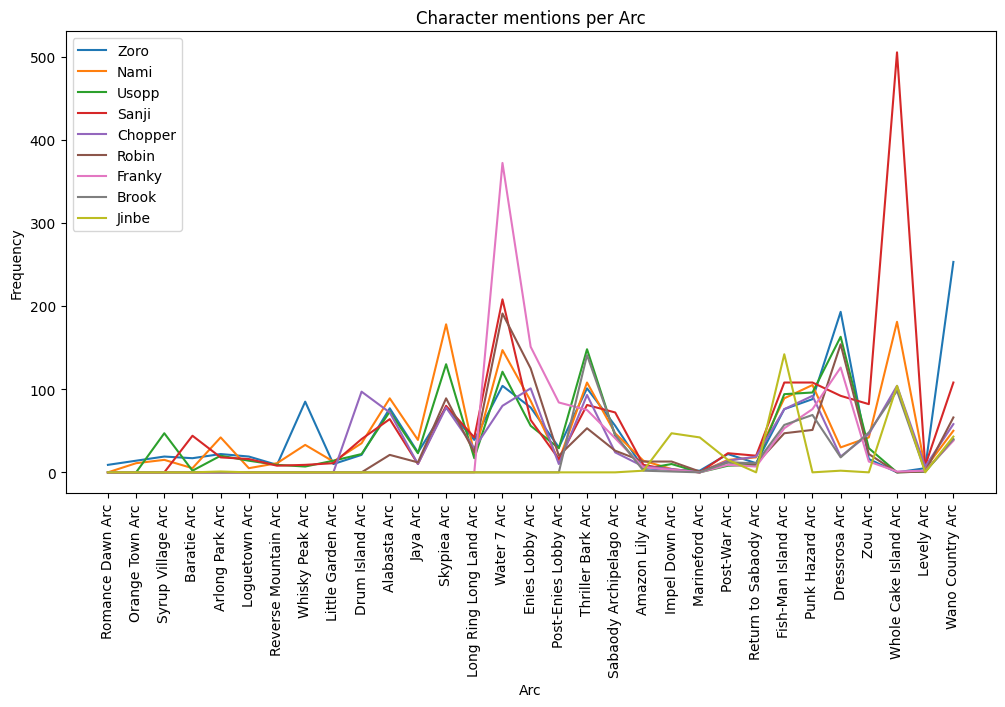

In [38]:
# Initialize a dictionary to store word frequencies per arc
arc_word_frequencies = {word: [] for word in words_to_check}
arc_word_frequencies['Arc'] = []

# Group the dataframe by 'Arc' and sort by the order of arcs in the series
arc_order = ['Romance Dawn Arc', 'Orange Town Arc', 'Syrup Village Arc', 'Baratie Arc', 'Arlong Park Arc', 
             'Loguetown Arc', 'Reverse Mountain Arc', 'Whisky Peak Arc', 'Little Garden Arc', 'Drum Island Arc', 
             'Alabasta Arc', 'Jaya Arc', 'Skypiea Arc', 'Long Ring Long Land Arc', 'Water 7 Arc', 'Enies Lobby Arc', 
             'Post-Enies Lobby Arc', 'Thriller Bark Arc', 'Sabaody Archipelago Arc', 'Amazon Lily Arc', 
             'Impel Down Arc', 'Marineford Arc', 'Post-War Arc', 'Return to Sabaody Arc', 'Fish-Man Island Arc', 
             'Punk Hazard Arc', 'Dressrosa Arc', 'Zou Arc', 'Whole Cake Island Arc', 'Levely Arc', 'Wano Country Arc']

df['Arc'] = pd.Categorical(df['Arc'], categories=arc_order, ordered=True)
grouped_df = df.groupby('Arc')

# Calculate word frequencies for each arc
for arc, group in grouped_df:
    arc_summary = ' '.join(group['Summary'].dropna()).lower()
    arc_word_frequencies['Arc'].append(arc)
    for word in words_to_check:
        arc_word_frequencies[word].append(arc_summary.split().count(word.lower()))

# Create a DataFrame for word frequencies per arc
arc_freq_df = pd.DataFrame(arc_word_frequencies)

# Plot the word frequencies per arc
plt.figure(figsize=(12, 6))
for word in words_to_check:
    sns.lineplot(data=arc_freq_df, x='Arc', y=word, label=word)

plt.xlabel('Arc')
plt.ylabel('Frequency')
plt.title('Character mentions per Arc')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Zoro in Romance Dawn Arc: 3
Nami in Romance Dawn Arc: 3
Usopp in Romance Dawn Arc: 3
Sanji in Romance Dawn Arc: 3
Chopper in Romance Dawn Arc: 3
Robin in Romance Dawn Arc: 3
Franky in Romance Dawn Arc: 3
Brook in Romance Dawn Arc: 3
Jinbe in Romance Dawn Arc: 3
Zoro in Orange Town Arc: 5
Nami in Orange Town Arc: 5
Usopp in Orange Town Arc: 5
Sanji in Orange Town Arc: 5
Chopper in Orange Town Arc: 5
Robin in Orange Town Arc: 5
Franky in Orange Town Arc: 5
Brook in Orange Town Arc: 5
Jinbe in Orange Town Arc: 5
Zoro in Syrup Village Arc: 10
Nami in Syrup Village Arc: 10
Usopp in Syrup Village Arc: 10
Sanji in Syrup Village Arc: 10
Chopper in Syrup Village Arc: 10
Robin in Syrup Village Arc: 10
Franky in Syrup Village Arc: 10
Brook in Syrup Village Arc: 10
Jinbe in Syrup Village Arc: 10
Zoro in Baratie Arc: 12
Nami in Baratie Arc: 12
Usopp in Baratie Arc: 12
Sanji in Baratie Arc: 12
Chopper in Baratie Arc: 12
Robin in Baratie Arc: 12
Franky in Baratie Arc: 12
Brook in Baratie Arc: 12
Jinb

C:\Users\Tomás\AppData\Local\Temp\ipykernel_59636\1746965397.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arc_episode_counts = df.groupby('Arc')['Episode'].count()


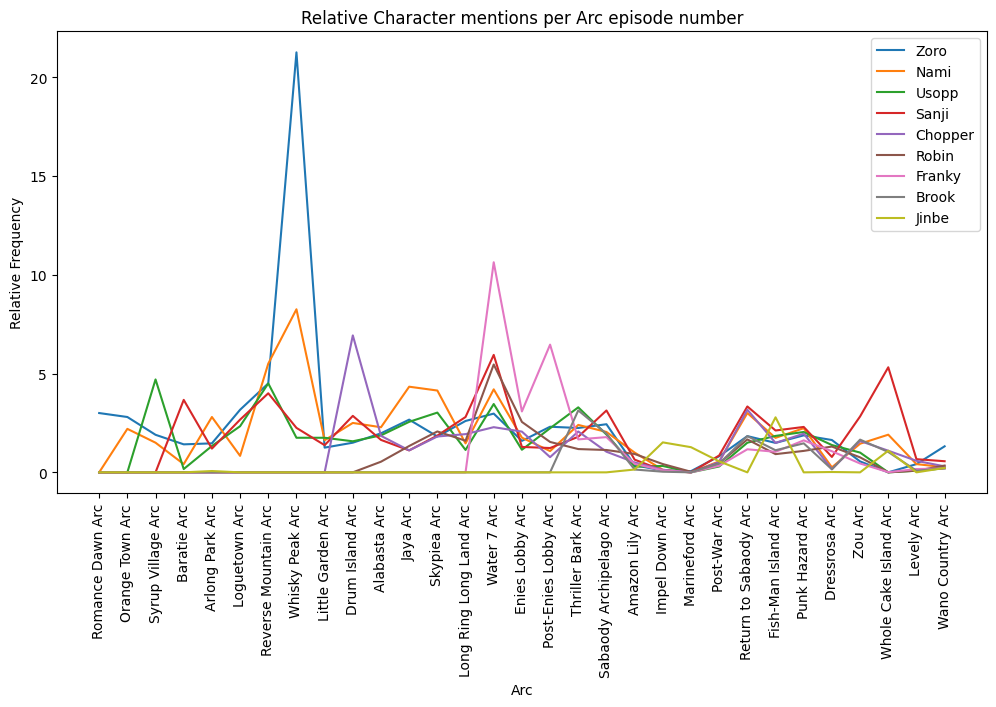

In [37]:
# Calculate the number of episodes in each arc
arc_episode_counts = df.groupby('Arc')['Episode'].count()

# Initialize a dictionary to store relative word frequencies per arc
relative_arc_word_frequencies = {word: [] for word in words_to_check}
relative_arc_word_frequencies['Arc'] = []

# Calculate relative word frequencies for each arc
for arc in arc_order:
    if arc in arc_episode_counts:
        num_episodes = arc_episode_counts[arc]
        relative_arc_word_frequencies['Arc'].append(arc)
        for word in words_to_check:
            total_word_count = arc_freq_df.loc[arc_freq_df['Arc'] == arc, word].values[0]
            relative_frequency = total_word_count / num_episodes
            print(f'{word} in {arc}: {num_episodes}')
            relative_arc_word_frequencies[word].append(relative_frequency)

# Create a DataFrame for relative word frequencies per arc
relative_arc_freq_df = pd.DataFrame(relative_arc_word_frequencies)

# Plot the relative word frequencies per arc
plt.figure(figsize=(12, 6))
for word in words_to_check:
    sns.lineplot(data=relative_arc_freq_df, x='Arc', y=word, label=word)

plt.xlabel('Arc')
plt.ylabel('Relative Frequency')
plt.title('Relative Character mentions per Arc episode count')
plt.legend()
plt.xticks(rotation=90)
plt.show()